This file is for development for testing code for the development of an Data Ingestion Pipeline.

Starting from basics... CSV

In [148]:
#imports
%matplotlib inline
import csv
import os
import requests
import pandas as pd
import numpy as np
import glob
import math

In [1]:
#Basic but works, could write an array filling application that fits into the for loop.

with open('20160701.txt', 'rb') as csvfile:
    asxTest = csv.reader(csvfile, delimiter=',')
    for row in asxTest:
        i = 1
        
        print ' '.join(row)
        
        if i >= 6:
            print '\n'
            i = 1
        i += 1
        

Thanks to contributions from AWAK, shall use pandas to import the data as that seems pretty fricken easy.

Next step is to create a company object in python, then ingest multiple days data to build a histogram from the company object.



In [2]:
#Define company object 
#Note - if multiple constructors are required look up @classmethod

#import dependencies

import numpy as np
import pandas as pd

class asxCompany:
    #class variables and objects
    #code = ''        ASX Code for Company
    #name = ''        Name of Company
    #ind = ''         Industry Group of Company
    #data = np array  Historic Data
    
    def __init__(self,code,data):
        self.code = code
        self.data = data
    
    
    


    

In [17]:
stocks = pd.read_csv('20160701.txt',sep=',',header=None)
stocks.columns = ['code', 'date', 'open', 'low', 'high', 'close', 'volume']

ASX_1AG = asxCompany(stocks.loc[0,'code'], pd.DataFrame(stocks[:1]))
    

In [20]:
print ASX_1AG.code
print ASX_1AG.data


1AG
  code      date   open    low   high  close  volume
0  1AG  20160701  0.054  0.054  0.054  0.054   20000


instance

In [60]:
#Snippets  
#class methods
#def sumTest(self):#need to include 'self' as the first reference in a class method, this 
                      #provides the method with access to the local class attributes
#        a = self.x + self.y
#       return a


# Working Code!
##This shit works!

In [137]:
#This appends all files with .txt extention to a dataframe

path = "/home/tom/finAnalytics/finAnalytics/testingGrounds/ingestion/dataAll/"
files = glob.glob(os.path.join(path,"*.txt"))

dataList = []
for dataFile in files:
    df = pd.read_csv(dataFile,sep=',',header=None)
    dataList.append(df)
data = pd.concat(dataList)
data.columns = ['code', 'date', 'open', 'low', 'high', 'close', 'volume'] #labels columns
data = data.sort_values(by='date', ascending=True) #sorts data in ascending order based on date column

In [182]:
#Some functions for basic analysis

#returns a dataframe with a single company time series
def companyTimeSeries(asxCode, asxData):
    timeSeries = asxData.loc[asxData['code'] == asxCode]
    return timeSeries

#plots a company's time series
def plotCompanyTimeSeries(asxCode, asxData):
    timeSeries = asxData.loc[asxData['code'] == asxCode]
    timeSeries.plot(x='date', y='close')
    return

#plots a company's time series, and 3-day moving average
def plotCTSAverage(asxCode, asxData, aveInterval):
    timeSeries = asxData.loc[asxData['code'] == asxCode]
    timeSeries = timeSeries.reset_index(drop=True)
    timeSeries['average'] = np.nan
    sLength = len(timeSeries['date'])
    
    #need to do some checks based on the aveInterval 
    if (aveInterval % 2) > 0: #if it is odd
        upper = int(math.ceil(aveInterval * .5))
        lower = int(math.floor(aveInterval * .5))
    else: #if it is even
        upper = int(aveInterval / 2)
        lower = int(aveInterval / 2 - 1)
    
    #need to check if there is enough data to do average calc
    if aveInterval > sLength:
        print "Chosen interval exceeds length: ", sLength
        return

    for i in range(lower, sLength - upper): #there has to be a smart way here to choose where to start the iteration based on average interval chosen
        if i >= sLength - upper:
            break
        for j in range(0, aveInterval - 1):
            averages = np.zeros(aveInterval)
            averages[j] = timeSeries.iloc[i - lower + j]['close']
        
        timeSeries.ix[i, 'average'] = averages.mean()
        #a1 = timeSeries.iloc[i-1]['close']
        #a2 = timeSeries.iloc[i]['close']
        #a3 = timeSeries.iloc[i+1]['close']
        #ave = (a1+a2+a3)/3
        #timeSeries.ix[i, 'average'] = ave
        #print ave
    
    timeSeries.plot(x='date', y='average')
    #print timeSeries[['date','average']]
    
        
        

In [166]:
a = np.zeros([5])
print a
a[3] = 2
print a, a[0]

[ 0.  0.  0.  0.  0.]
[ 0.  0.  0.  2.  0.] 0.0


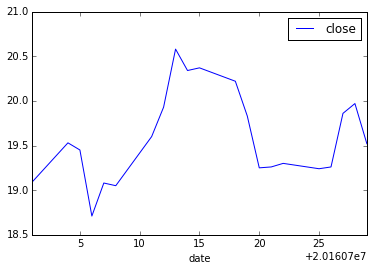

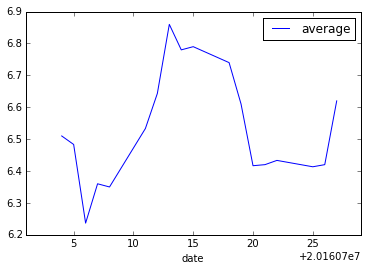

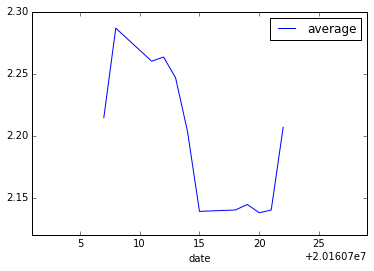

In [185]:
plotCompanyTimeSeries('BHP',data)
plotCTSAverage('BHP',data, 3)
plotCTSAverage('BHP',data, 9)

In [20]:
codes = data['code'].unique() #lists all unique ASX codes in data table



In [27]:
compData = data.loc[data['code'] == 'BHP']# This query returns all rows from the dataframe that has the 
                                # ASX code '1AG'
print compData    


    code      date   open     low   high  close    volume
195  BHP  20160701  19.02  19.350  18.99  19.09  13975365
206  BHP  20160704  19.08  19.575  19.07  19.53   9667123
206  BHP  20160705  19.57  19.640  19.43  19.45  12696503
207  BHP  20160706  18.70  18.790  18.57  18.71  11162087
200  BHP  20160707  19.09  19.300  18.99  19.08   8829446
204  BHP  20160708  18.67  19.170  18.60  19.05   8441527
212  BHP  20160711  19.40  19.600  19.38  19.60   7153845
214  BHP  20160712  19.79  20.090  19.76  19.93  11299205
202  BHP  20160713  20.35  20.620  20.22  20.58   9932227
203  BHP  20160714  20.50  20.500  20.11  20.34   8583966
214  BHP  20160715  20.25  20.530  20.22  20.37   6503902
214  BHP  20160718  20.20  20.290  20.10  20.22   9240195
212  BHP  20160719  19.92  20.200  19.81  19.83   9095999
207  BHP  20160720  19.02  19.330  19.01  19.25  16121968
210  BHP  20160721  19.10  19.380  19.07  19.26  12628073
212  BHP  20160722  19.32  19.570  19.24  19.30   6721896
215  BHP  2016

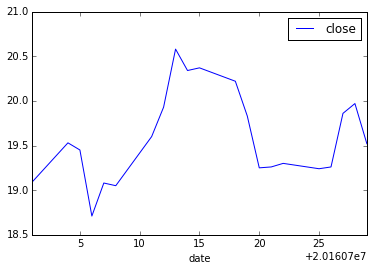

In [28]:
compData.plot(x='date',y='close') #matplotlib accepts column headings as kwargs!!!!! makes plotting fricking simple

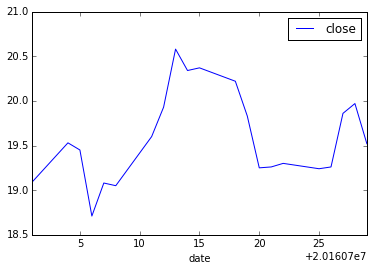

In [35]:
fff = plotCompanyTimeSeries('BHP', data)